In [1]:
# from google.colab import drive
# drive.mount('/content/drive')


In [2]:
# !pip install textattack

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/data/home/huixian/Documents/Sentiment_Analysis_of_RateMyProfessor_Reviews/streamline/complete_set.csv')
# train, test = train_test_split(data, test_size=0.2, random_state=42)
print(data.shape)

(35047, 25)


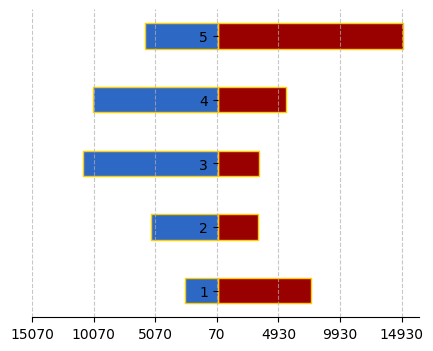

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Data
y1_axis = [7610, 3242, 3377, 5536, 15070]
y2_axis = [2689, 5398, 10921, 10141, 5898]
x_axis = [1, 2, 3, 4, 5]

# Create a bidirectional bar chart
fig, ax = plt.subplots(figsize=(5, 4))

# Plot y1_axis (left side bars)
ax.barh(x_axis, y1_axis, color='#990000', edgecolor='#FFCC00', height=0.4, align='center', label='y1_axis (left)')

# Plot y2_axis (right side bars)
ax.barh(x_axis, [-val for val in y2_axis], color='#2D68C4', edgecolor='#FFCC00', height=0.4, align='center', label='y2_axis (right)')

# Add labels, title, and legend
# ax.set_xlabel('Frequency')
# ax.set_title('Bidirectional Bar Chart')

# Set y-axis in the center
ax.spines['left'].set_position(('data', 0))
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

# Add grid for clarity
ax.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust x-ticks to show absolute values for the right-side bars
ax.set_xticks(range(-max(max(y1_axis), max(y2_axis)), max(max(y1_axis), max(y2_axis)) + 1, 5000))
ax.set_xticklabels([abs(val) for val in ax.get_xticks()])

plt.show()



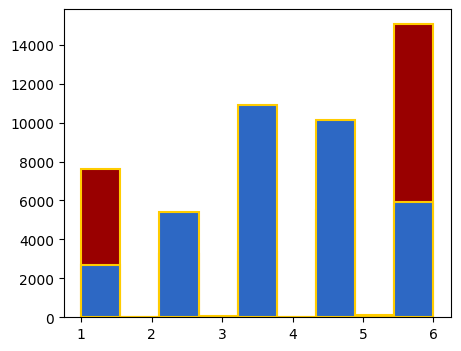

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Data
y1_axis = [7610, 39, 3242, 45, 3377, 35, 5536, 93, 15070]
y2_axis = [2689, 0, 5398, 0, 10921, 0, 10141, 0, 5898]
x_axis = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6]

# Extend x_axis if needed
if len(x_axis) < len(y1_axis):
    x_axis.extend([x_axis[-1] + 0.5 * i for i in range(1, len(y1_axis) - len(x_axis) + 1)])

# Define bins and weights
bins = np.linspace(min(x_axis), max(x_axis), len(y1_axis) + 1)
# counts = y_axis  # Use y_axis as the weights

# Colors
colors = ['#990000' if i % 2 == 0 else '#2D68C4' for i in range(len(counts))]

# Plot histogram
plt.figure(figsize=(5, 4))
plt.hist(bins[:-1], bins, weights=y1_axis, color=colors[0], edgecolor='#FFCC00', linewidth=1.5)
plt.hist(bins[:-1], bins, weights=y2_axis, color='#2D68C4', edgecolor='#FFCC00', linewidth=1.5)

# Add labels and title
# plt.xlabel('X-axis')
# plt.ylabel('Y-axis (Frequency)')
# plt.title('Histogram with Custom Colors and Edge')
# plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


[7610, 39, 3242, 45, 3377, 35, 5536, 93, 15070]
[7610, 39, 3242, 45, 3377, 35, 5536, 93, 15070]


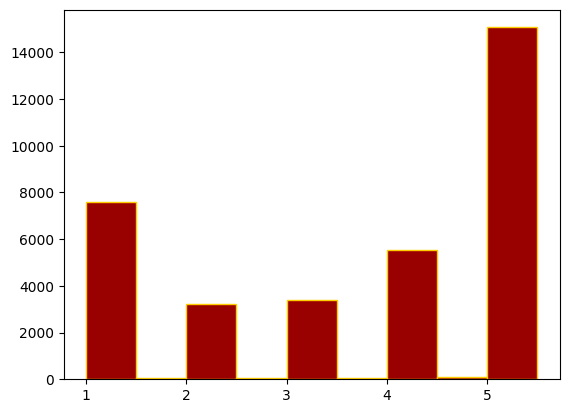

In [ ]:
bins = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]
counts = [data[data['star_rating'] == label].shape[0] for label in bins[:-1]]
print(counts)
plt.hist(bins[:-1], bins, weights=counts, color='#990000', edgecolor='#FFCC00')
plt.show()

[2689, 0, 5398, 0, 10921, 0, 10141, 0, 5898]


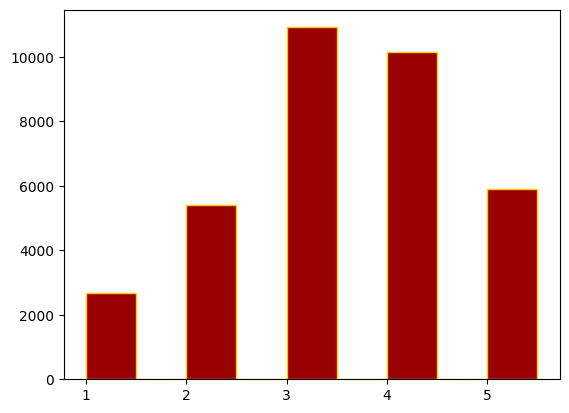

In [6]:
bins = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5]
counts = [data[data['course_difficulty'] == label].shape[0] for label in bins[:-1]]
print(counts)
plt.hist(bins[:-1], bins, weights=counts, color='#990000', edgecolor='#FFCC00')
plt.show()

gives_good_feedback         5538
caring                      6329
respected                   5722
participation_matters       4709
clear_grading_criteria      4029
amazing_lectures            5862
inspirational               3433
tough_grader                8823
hilarious                   4230
get_ready_to_read           7573
lots_of_homework            4343
accessible_outside_class    4372
lecture_heavy               6294
extra_credit                1424
graded_by_few_things        4575
group_projects              1725
would_take_again             244
skip_class_you_wont_pass    4977
test_heavy                  4636
so_many_papers              1251
beware_of_pop_quizzes        855
tests_are_tough              212
dtype: int64
Number of tags per comment:
3    25641
2     5514
1     3205
0      687
Name: count, dtype: int64


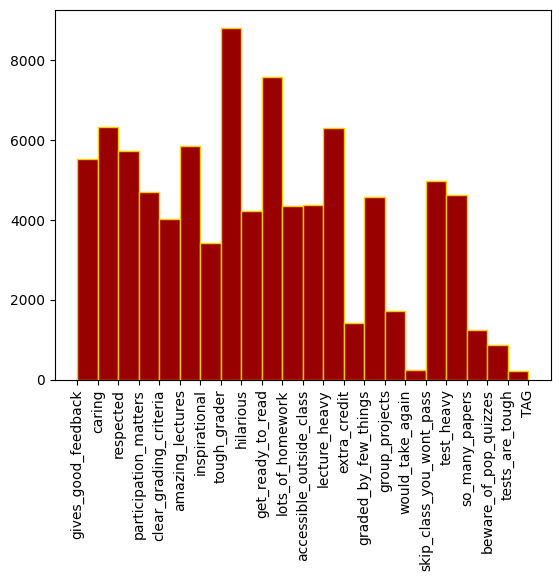

In [20]:
bins = ['gives_good_feedback',
       'caring', 'respected', 'participation_matters',
       'clear_grading_criteria', 'amazing_lectures', 'inspirational',
       'tough_grader', 'hilarious', 'get_ready_to_read', 'lots_of_homework',
       'accessible_outside_class', 'lecture_heavy', 'extra_credit',
       'graded_by_few_things', 'group_projects', 'would_take_again',
       'skip_class_you_wont_pass', 'test_heavy', 'so_many_papers',
       'beware_of_pop_quizzes', 'tests_are_tough','TAG']
counts = [data[data[label] == 1].shape[0] for label in bins[:-1]]
print(data.drop(columns=['comment', 'star_rating', 'course_difficulty']).sum(axis=0))
print(f"Number of tags per comment:\n{data.drop(columns=['comment', 'star_rating', 'course_difficulty']).sum(axis=1).value_counts()}")
plt.hist(bins[:-1], bins, weights=counts, edgecolor='#FFCC00', color='#990000',)

plt.xticks(rotation=90)
plt.show()

In [38]:
# from textattack.augmentation import EmbeddingAugmenter, WordNetAugmenter, CharSwapAugmenter

# text = "Trouble is, if you have different opinions on the topics you talk about then she won\'t like you. As long as you stick to what she lays out you should be good. She wants very badly to have students she molds, if she can\'t mold you she\'ll throw you away."

# ea = EmbeddingAugmenter()
# wna = WordNetAugmenter()
# csa = CharSwapAugmenter()

# augmented_text = ea.augment(wna.augment(csa.augment(text)[0])[0])[0]

# print(f"Original Text: {text}")
# print(f"Augmented Text: {augmented_text}")

In [39]:
# # Create a list of dataframes to be concatenated
# dfs = [train[train['student_star'] == star] for star in [1.5, 2, 2.5, 3, 3.5]]

# # Concatenate the dataframes
# temp = pd.concat(dfs, ignore_index=True)

# print(temp.shape)

In [40]:
# dfs[0]['comments'] = dfs[0]['comments'].apply(lambda x: ea.augment(wna.augment(csa.augment(x)[0])[0])[0])
# print(dfs[0]['comments'].head())

In [ ]:
dfs[1]['comments'] = dfs[1]['comments'].apply(lambda x: ea.augment(wna.augment(csa.augment(x)[0])[0])[0])
print(dfs[1]['comments'].head())

In [ ]:
dfs[2]['comments'] = dfs[2]['comments'].apply(lambda x: ea.augment(wna.augment(csa.augment(x)[0])[0])[0])
print(dfs[2]['comments'].head())

In [ ]:
dfs[3]['comments'] = dfs[3]['comments'].apply(lambda x: ea.augment(wna.augment(csa.augment(x)[0])[0])[0])
print(dfs[3]['comments'].head())

In [ ]:
dfs[4]['comments'] = dfs[4]['comments'].apply(lambda x: ea.augment(wna.augment(csa.augment(x)[0])[0])[0])
print(dfs[4]['comments'].head())

In [ ]:
train = pd.concat([data, *dfs], ignore_index=True)
print(train.shape)

In [ ]:
train = train.drop(train[train['student_star'] == 5].sample(frac=0.6).index)
print(train.shape)

In [ ]:
train.to_csv('sample_data/augmented_trainONLY.csv', index=False)

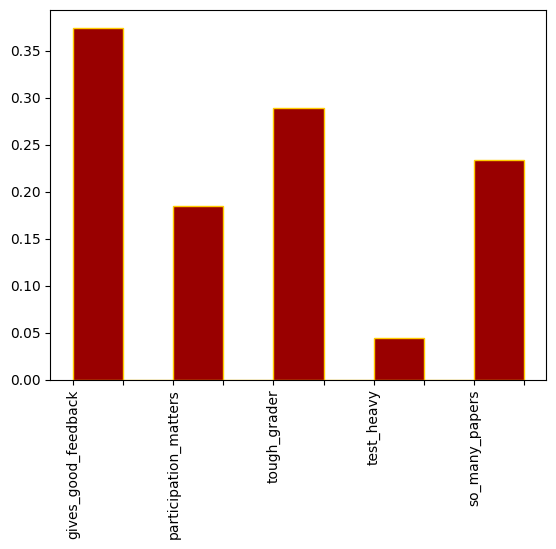

In [8]:
bins = ['gives_good_feedback',' ',
       'participation_matters','  ',
       'tough_grader', '   ',
       'test_heavy', '    ',
       'so_many_papers','     ',
       ]
counts = [0.374834, 0, 0.184374,0, 0.289443, 0,0.043784, 0,0.233463]
# print(data.drop(columns=['comment', 'star_rating', 'course_difficulty']).sum(axis=0))
# print(f"Number of tags per comment:\n{data.drop(columns=['comment', 'star_rating', 'course_difficulty']).sum(axis=1).value_counts()}")
plt.hist(bins[:-1], bins, weights=counts, edgecolor='#FFCC00', color='#990000',)

plt.xticks(rotation=90)
plt.show()